In [1]:
from ast import literal_eval
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## <strong>Dataset credit: https://arxiv.org/pdf/2206.08474.pdf </strong>

# Retrieval part of the dataset

In [2]:
RETRIEVAL_DATASET_PATH = '../../../data/raw/XLCoST_data/retrieval/nl2code_search/'

## Program level

In [3]:
import json

with open(RETRIEVAL_DATASET_PATH + 'program_level/C#/train.jsonl', 'r', encoding='utf-8') as json_file:
    train_json_list = list(json_file)
with open(RETRIEVAL_DATASET_PATH + 'program_level/C#/valid.jsonl', 'r', encoding='utf-8') as json_file:
    val_json_list = list(json_file)
with open(RETRIEVAL_DATASET_PATH + 'program_level/C#/test.jsonl', 'r', encoding='utf-8') as json_file:
    test_json_list = list(json_file)

In [4]:
train_data = pd.DataFrame([literal_eval(line) for line in train_json_list]).set_index('idx')
val_data = pd.DataFrame([literal_eval(line) for line in val_json_list]).set_index('idx')
test_data = pd.DataFrame([literal_eval(line) for line in test_json_list]).set_index('idx')

In [5]:
train_data

,docstring_tokens,code_tokens,url
idx,,,
10005,"[Maximum, Prefix, Sum, possible, by, merging, ...","[using, System, ;, using, System, ., Collectio...",10005-C#
10010,"[Check, if, a, number, can, be, represented, a...","[using, System, ;, class, GFG, {, static, bool...",10010-C#
10023,"[Nth, natural, number, after, removing, all, n...","[using, System, ;, class, GFG, {, static, long...",10023-C#
10033,"[Check, if, an, integer, is, rotation, of, ano...","[using, System, ;, public, class, GFG, {, stat...",10033-C#
10046,"[Count, of, quadruples, with, product, of, a, ...","[using, System, ;, class, GFG, {, static, void...",10046-C#
...,...,...,...
6159,"[Count, of, ways, to, traverse, a, Matrix, and...","[using, System, ;, class, GFG, {, static, int,...",6159-C#
6187,"[Count, of, subsequences, of, length, atmost, ...","[using, System, ;, using, System, ., Collectio...",6187-C#
6195,"[Minimize, prize, count, required, such, that,...","[using, System, ;, class, GFG, {, static, int,...",6195-C#


In [6]:
for i in np.random.randint(0, len(train_data), 5):
    row = train_data.iloc[i]
    print(row["docstring_tokens"])
    print(row["code_tokens"])
    print(' '.join(row["code_tokens"]))
    print('-' * 45)

['Largest', 'number', 'less', 'than', 'N', 'whose', 'each', 'digit', 'is', 'prime', 'number']
['using', 'System', ';', 'class', 'GFG', '{', 'static', 'char', '[', ']', 'PrimeDigitNumber', '(', 'char', '[', ']', 'N', ',', 'int', 'size', ')', '{', 'char', '[', ']', 'ans', '=', 'new', 'char', '[', 'size', ']', ';', 'int', 'ns', '=', '0', ';', 'int', 'small', '=', '0', ';', 'int', 'i', ';', 'int', '[', ']', 'p', '=', '{', '0', ',', '0', ',', '1', ',', '1', ',', '0', ',', '1', ',', '0', ',', '1', ',', '0', ',', '0', '}', ';', 'int', '[', ']', 'prevprime', '=', '{', '0', ',', '0', ',', '0', ',', '2', ',', '3', ',', '3', ',', '5', ',', '5', ',', '7', ',', '7', '}', ';', 'if', '(', 'size', '==', '1', ')', '{', 'ans', '[', '0', ']', '=', '(', 'char', ')', '(', 'prevprime', '[', 'N', '[', '0', ']', '-', "'0'", ']', '+', "'0'", ')', ';', 'ans', '[', '1', ']', '=', "' \\0'", ';', 'return', 'ans', ';', '}', 'if', '(', 'N', '[', '0', ']', '==', "'1'", ')', '{', 'for', '(', 'i', '=', '0', ';', 'i', '

Train code number of tokens mean and std: 216.9108±128.2541 with 14 <= code_len <= 1495


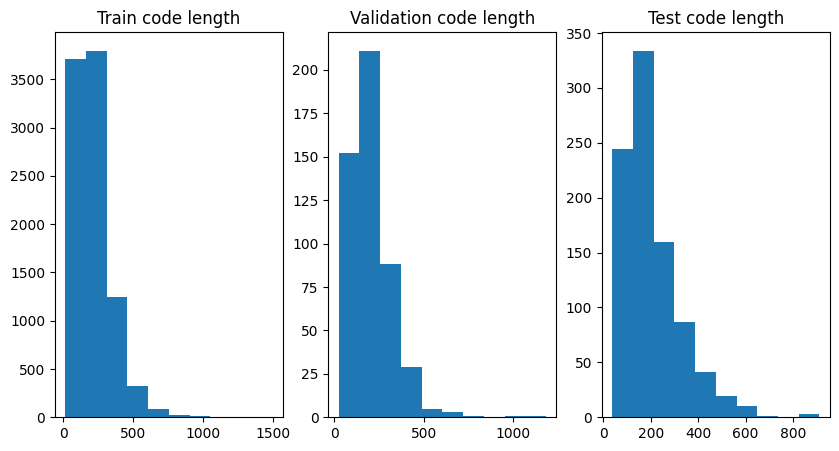

In [7]:
plt.figure(figsize=(10, 5))
plt.subplot(131)
lengths = np.array([len(code) for code in train_data["code_tokens"]])
plt.hist(lengths)
plt.title('Train code length')
print(f'Train code number of tokens mean and std: {round(lengths.mean(), 4)}±{round(lengths.std(), 4)} with {lengths.min()} <= code_len <= {lengths.max()}')
plt.subplot(132)
lengths = [len(code) for code in val_data["code_tokens"]]
plt.hist(lengths)
plt.title('Validation code length')
plt.subplot(133)
lengths = [len(code) for code in test_data["code_tokens"]]
plt.title('Test code length')
plt.hist(lengths);

Train queries number of tokens mean and std: 10.792±10.0699 with 1 <= query_len <= 791


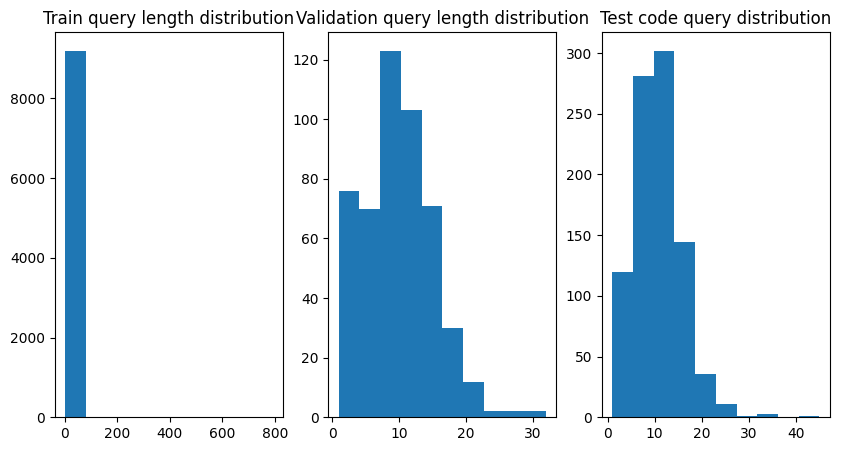

In [8]:
plt.figure(figsize=(10, 5))
plt.subplot(131)
lengths = np.array([len(code) for code in train_data["docstring_tokens"]])
plt.hist(lengths)
plt.title('Train query length distribution')
print(f'Train queries number of tokens mean and std: {round(lengths.mean(), 4)}±{round(lengths.std(), 4)} with {lengths.min()} <= query_len <= {lengths.max()}')
plt.subplot(132)
lengths = [len(code) for code in val_data["docstring_tokens"]]
plt.hist(lengths)
plt.title('Validation query length distribution')
plt.subplot(133)
lengths = [len(code) for code in test_data["docstring_tokens"]]
plt.title('Test code query distribution')
plt.hist(lengths);

In [9]:
nl_tokens_freq = Counter()
pl_tokens_freq = Counter()
for i, row in train_data.iterrows():
    nl_tokens_freq.update(row["docstring_tokens"])
    pl_tokens_freq.update(row["code_tokens"])

In [10]:
print([i[0] for i in nl_tokens_freq.most_common(20)], '\n')
print([i[0] for i in pl_tokens_freq.most_common(20)])

['of', 'a', 'the', 'to', 'in', 'given', 'number', 'array', 'N', 'Find', 'Count', 'and', 'sum', 'with', 'by', 'all', 'that', 'is', 'elements', 'from'] 

[';', '(', ')', '=', 'int', ',', '{', '}', 'i', ']', '[', '.', '1', '0', 'n', 'static', '+', '-', 'if', '<']


In [11]:
print([i[0] for i in nl_tokens_freq.most_common()[-20:]], '\n')
print([i[0] for i in pl_tokens_freq.most_common()[-20:]])

['LxW', 'minutes', 'stolen', 'Convolution', 'cities', 'segregating', "'s Algorithm)", 'Intervals', 'ages', 'subsequense', "'s to be replaced in a binary array", 'Original', 'solved', "'s Algorithm (Simple Implementation for Adjacency Matrix)", 'Schedule', 'load', 'survive', 'Island', 'crossing', 'KMP'] 

['" here "', '" there "', '" Edge ▁ { 0 } : ( { 1 } , ▁ { 2 } ) ▁ cost : { 3 } ▁ STRNEWLINE "', '" Chocolates ▁ left ▁ after ▁ "', '" ▁ iterations ▁ are ▁ "', '" The ▁ empty ▁ array ▁ "', '" shows ▁ minimum ▁ Deviation "', '" Answer ▁ to ▁ Query "', '" Largest ▁ possible ▁ permutation ▁ after ▁ "', '" ▁ swaps ▁ is ▁ "', '" STRNEWLINE Process ▁ No . TABSYMBOL Process "', '" ▁ Size TABSYMBOL Block ▁ no . "', '" Number ▁ of ▁ bins ▁ required ▁ in ▁ Best ▁ Fit ▁ : ▁ "', '" Number ▁ of ▁ bins ▁ required ▁ in ▁ Worst ▁ Fit ▁ : ▁ "', '" btagd "', '4096', '" ? 0 ? "', '" adbabd "', '" ▁ times . "', '" ABACABA "']


microconclusion: tokenization is not ideal

In [12]:
# Count the number of tokens in the dataset
print(f'NL tokens: {sum(nl_tokens_freq.values())}')
print(f'PL tokens: {sum(pl_tokens_freq.values())}')

NL tokens: 99297
PL tokens: 1995796


## Snippet level

In [13]:
import json

with open(RETRIEVAL_DATASET_PATH + 'snippet_level/C#/train.jsonl', 'r', encoding='utf-8') as json_file:
    train_json_list = list(json_file)
with open(RETRIEVAL_DATASET_PATH + 'snippet_level/C#/valid.jsonl', 'r', encoding='utf-8') as json_file:
    val_json_list = list(json_file)
with open(RETRIEVAL_DATASET_PATH + 'snippet_level/C#/test.jsonl', 'r', encoding='utf-8') as json_file:
    test_json_list = list(json_file)

In [14]:
train_data = pd.DataFrame([literal_eval(line) for line in train_json_list]).set_index('idx')
val_data = pd.DataFrame([literal_eval(line) for line in val_json_list]).set_index('idx')
test_data = pd.DataFrame([literal_eval(line) for line in test_json_list]).set_index('idx')

In [15]:
train_data

,docstring_tokens,code_tokens,url
idx,,,
100051,"[C, #, Program, to, implement, the, above, app...","[using, System, ;, using, System, ., Collectio...",10005-C#-1
100052,"[Stores, the, maximum, prefix, sum, of, the, a...","[int, X, =, Math, ., Max, (, a, [, 0, ], ,, 0,...",10005-C#-2
100053,"[Traverse, the, array, A, [, ]]","[for, (, int, i, =, 1, ;, i, <, a, ., Count, ;...",10005-C#-3
100054,"[Stores, the, maximum, prefix, sum, of, the, a...","[int, Y, =, Math, ., Max, (, b, [, 0, ], ,, 0,...",10005-C#-4
100055,"[Traverse, the, array, B, [, ]]","[for, (, int, i, =, 1, ;, i, <, b, ., Count, ;...",10005-C#-5
...,...,...,...
62139,"[if, it, gives, less, count, then, update, it]","[if, (, arr, [, i, ], >, arr, [, i, -, k, *, k...",6213-C#-9
621310,"[List, v, stores, optimum, square, number, who...","[while, (, n, >, 0, ), {, v, ., Add, (, sqrNum...",6213-C#-10
621311,"[Driver, code]","[public, static, void, Main, (, String, [, ], ...",6213-C#-11


In [16]:
for i in np.random.randint(0, len(train_data), 5):
    row = train_data.iloc[i]
    print(row["docstring_tokens"])
    print(row["code_tokens"])
    print(' '.join(row["code_tokens"]))
    print('-' * 45)

['Driver', 'Code']
['public', 'static', 'void', 'Main', '(', 'String', '[', ']', 'args', ')', '{', 'solveNQ', '(', ')', ';', '}', '}']
public static void Main ( String [ ] args ) { solveNQ ( ) ; } }
---------------------------------------------
['Initially', 'it', 'is', 'set', 'to', 'INF', 'that', 'means', 'we', 'can', "'t transform cur to M"]
['int', 'op', '=', 'INF', ';']
int op = INF ;
---------------------------------------------
['Returns', 'n', '!', '%', 'p']
['static', 'int', 'modFact', '(', 'int', 'n', ',', 'int', 'p', ')', '{', 'if', '(', 'n', '>=', 'p', ')', '{', 'return', '0', ';', '}', 'int', 'res', '=', '1', ';']
static int modFact ( int n , int p ) { if ( n >= p ) { return 0 ; } int res = 1 ;
---------------------------------------------
['If', 'first', 'and', 'last', 'digit', 'not', 'same', 'return', 'false']
['if', '(', 'leading', '!=', 'trailing', ')', 'return', 'false', ';']
if ( leading != trailing ) return false ;
---------------------------------------------
['trav

Train code number of tokens mean and std: 23.0881±22.3695 with 1 <= code_len <= 547


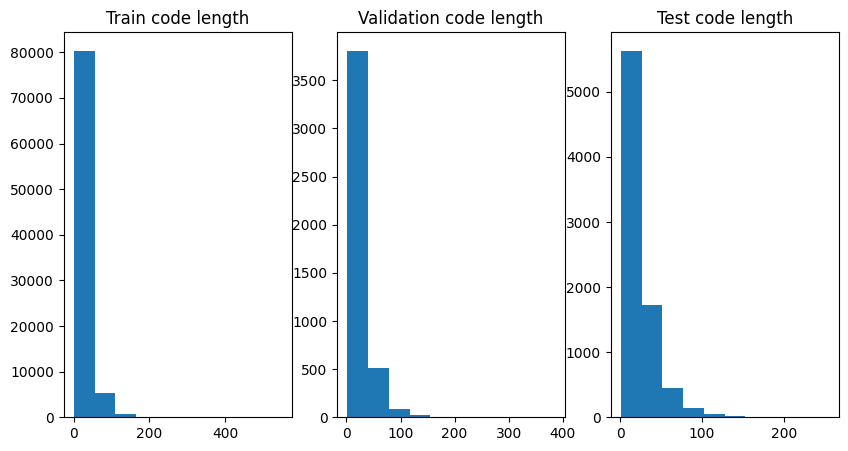

In [17]:
plt.figure(figsize=(10, 5))
plt.subplot(131)
lengths = np.array([len(code) for code in train_data["code_tokens"]])
plt.hist(lengths)
plt.title('Train code length')
print(f'Train code number of tokens mean and std: {round(lengths.mean(), 4)}±{round(lengths.std(), 4)} with {lengths.min()} <= code_len <= {lengths.max()}')
plt.subplot(132)
lengths = [len(code) for code in val_data["code_tokens"]]
plt.hist(lengths)
plt.title('Validation code length')
plt.subplot(133)
lengths = [len(code) for code in test_data["code_tokens"]]
plt.title('Test code length')
plt.hist(lengths);

Train queries number of tokens mean and std: 8.2261±6.7364 with 0 <= query_len <= 158


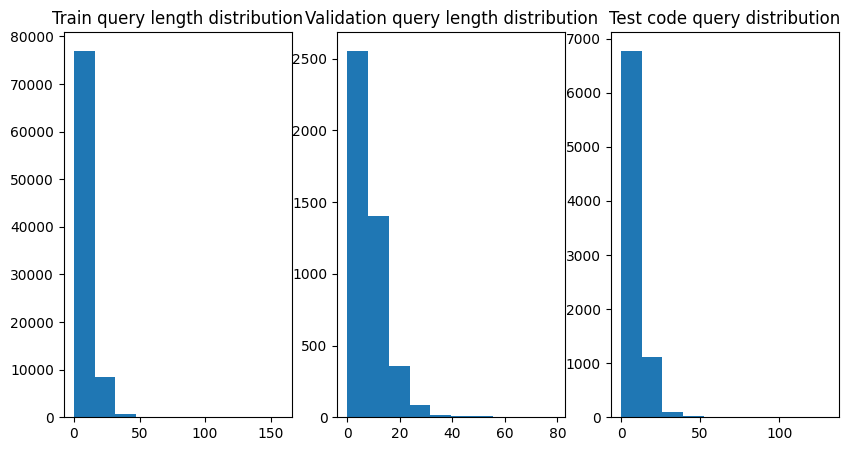

In [18]:
plt.figure(figsize=(10, 5))
plt.subplot(131)
lengths = np.array([len(code) for code in train_data["docstring_tokens"]])
plt.hist(lengths)
plt.title('Train query length distribution')
print(f'Train queries number of tokens mean and std: {round(lengths.mean(), 4)}±{round(lengths.std(), 4)} with {lengths.min()} <= query_len <= {lengths.max()}')
plt.subplot(132)
lengths = [len(code) for code in val_data["docstring_tokens"]]
plt.hist(lengths)
plt.title('Validation query length distribution')
plt.subplot(133)
lengths = [len(code) for code in test_data["docstring_tokens"]]
plt.title('Test code query distribution')
plt.hist(lengths);

In [19]:
nl_tokens_freq = Counter()
pl_tokens_freq = Counter()
for i, row in train_data.iterrows():
    nl_tokens_freq.update(row["docstring_tokens"])
    pl_tokens_freq.update(row["code_tokens"])

In [20]:
print([i[0] for i in nl_tokens_freq.most_common(20)], '\n')
print([i[0] for i in pl_tokens_freq.most_common(20)])

['the', 'of', 'to', 'is', 'Function', 'C', '#', 'Driver', 'in', 'and', 'number', ',', 'a', '.', 'array', '[', ']', 'for', 'If', 'program'] 

[';', '(', ')', '=', 'int', ',', '{', '}', 'i', ']', '[', '.', '1', '0', 'n', 'static', '+', '-', 'if', '<']


In [21]:
print([i[0] for i in nl_tokens_freq.most_common()[-20:]], '\n')
print([i[0] for i in pl_tokens_freq.most_common()[-20:]])

['ca', "' time '", 'provides', "'s in a string", 'exc', 'arectangle', 'sumSet', 'amke', 'rightIncreasing', 'Iif', 'io', 'endIndex', 'globalStartIndex', 'anf', 'globalMaxStartIndex', 'prefix_function', 'orignal', "' s ▁ ▁ Return ▁ the ▁ count ▁ ▁ of ▁ 1'", 'of_length', 'sqrNum'] 

['" here "', '" there "', '" Edge ▁ { 0 } : ( { 1 } , ▁ { 2 } ) ▁ cost : { 3 } ▁ STRNEWLINE "', '" Chocolates ▁ left ▁ after ▁ "', '" ▁ iterations ▁ are ▁ "', '" The ▁ empty ▁ array ▁ "', '" shows ▁ minimum ▁ Deviation "', '" Answer ▁ to ▁ Query "', '" Largest ▁ possible ▁ permutation ▁ after ▁ "', '" ▁ swaps ▁ is ▁ "', '" STRNEWLINE Process ▁ No . TABSYMBOL Process "', '" ▁ Size TABSYMBOL Block ▁ no . "', '" Number ▁ of ▁ bins ▁ required ▁ in ▁ Best ▁ Fit ▁ : ▁ "', '" Number ▁ of ▁ bins ▁ required ▁ in ▁ Worst ▁ Fit ▁ : ▁ "', '" btagd "', '4096', '" ? 0 ? "', '" adbabd "', '" ▁ times . "', '" ABACABA "']


# Dataset report

### Function-level vs snippet-level

Snippet-level data appears to be the version of function-level data, fragmented by semantical load into smaller code chunks

As the original paper's authors [1] claim to have done pretraining on the bimodal (Natural language, Programming language) at the function level, it is reasonable to follow this approach in fine-tuning for a downstream task. Moreover, function-level retrieval task is harder than snippet-level and is thus expected to allow the pretrained model to generalize better

Snippet-level data, however, could be used as warmup / easy samples in the beginning of the fine-tuning. (TODO: test models with and without such warmup) 

### Size, domain, and raw tokenization

The dataset [2] size at function-level data is 733583 natural language tokens and 2172985 programming language tokens, totalling in 90085 pairs <NL, PL>

The mean±std length of a function is 229.0738±134.6016 tokens with 12 <= tokens <= 1831. Queries lengths mean and std are 10.7609±9.9451, and 1 <= query_len <= 791. Truncation of the dataset by preset code and query max length should be considered (T5, however, uses relative position embeddings, so this should not be a big problem)

The original tokenization has some defects (see least frequent tokens above) and may be subject to additional cleaning before BPE

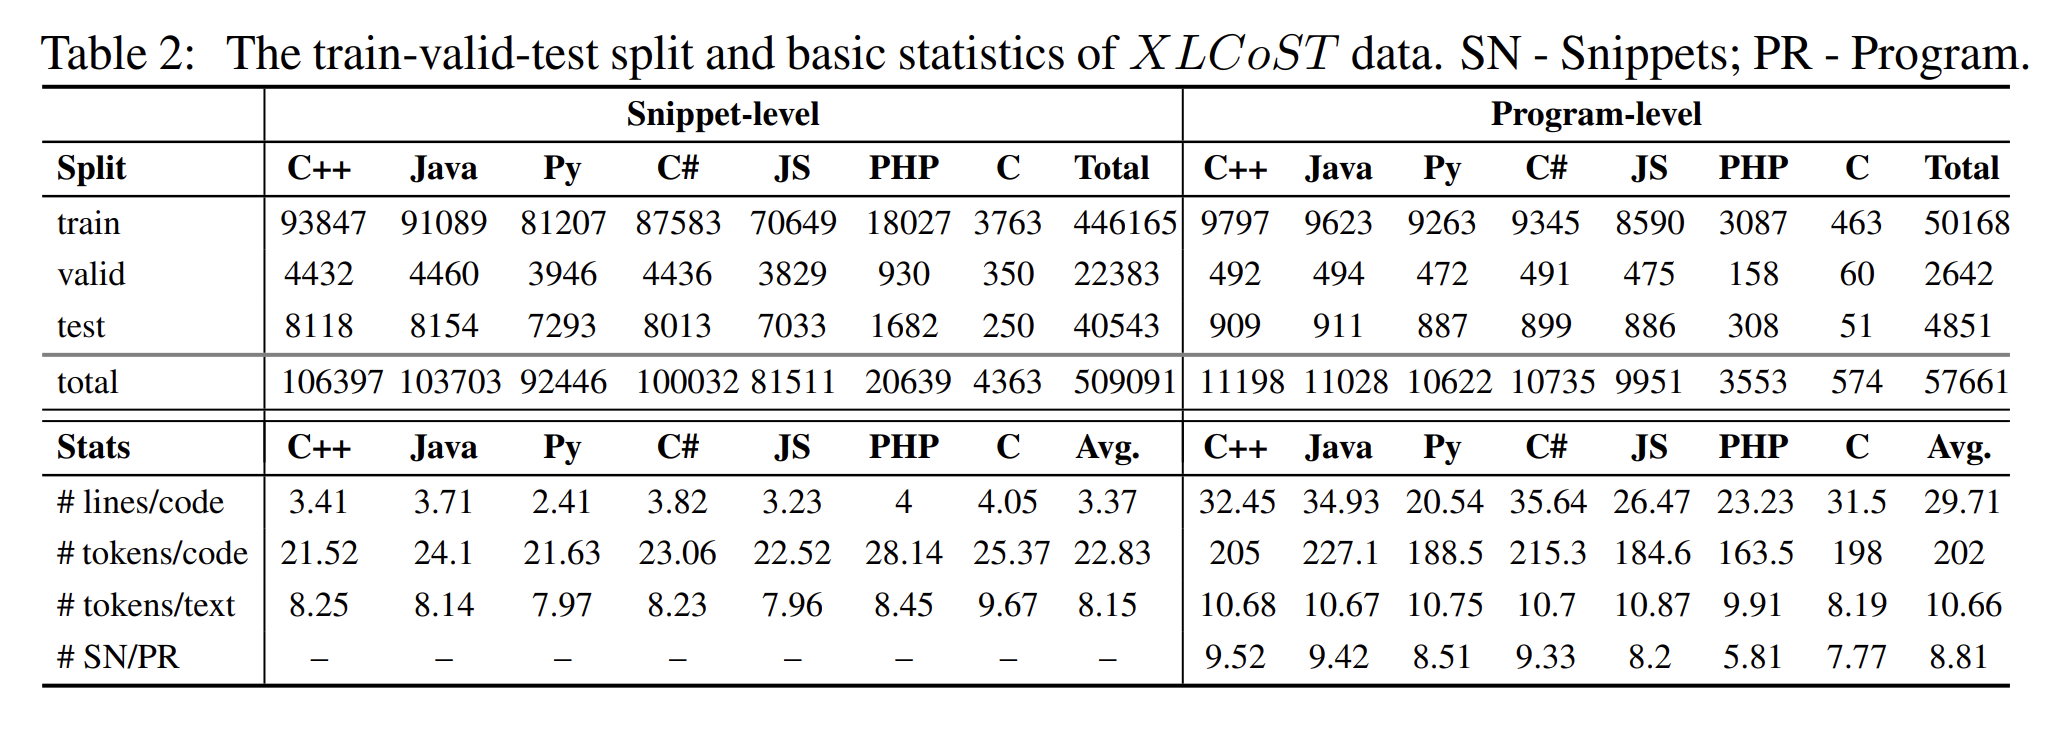
image credit - XLCoST paper [2]

### Generation part of the dataset 

This dataset also provides data for generative tasks, however, we focus on fine-tuning the pretrained model for the discriminative task (code retrieval)

### Intersection of this dataset with the pretrained model's train data

Y. Wang <em>et al.</em> [1] [have trained](https://paperswithcode.com/paper/codet5-open-code-large-language-models-for) the model on CodeXGLUE, HumanEval, GSM8K and CodeSearchNet. Of these 4, only CodeSearchNet and CodeXGLUE can be used for code searching (the former is actually a subset of the former). CodeXGLUE code searching subset consists of open-source github projects. The XLCoST dataset [2] authors have scraped code and comments from GeeksForGeeks website (primarily from Algorithms and Data Structures section). Therefore, there might be some intersections with the dataset, considered in this notebook, and CodeXGLUE, however, it should not be a major issue as we are tuning the model for a downstream task of C# code retrieval (and then aim to inference the resulting model as a mixture-of-experts for some small changes, say adapters, for each expert)

### On similiarities between this corpora and the one with Java

GeeksForGeeks often post code on several programming languages for the same problem, so intersection is expected to be high and structure / preprocessing should not deviate much. This is not an issue since fine-tuning is done separatel for each language.

### Sources

[1] https://arxiv.org/pdf/2305.07922.pdf

[2] https://arxiv.org/pdf/2206.08474.pdf